In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('202004-divvy-tripdata.csv')

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [4]:
df_train = df[['started_at', 'ended_at', 'start_station_id', 'end_station_id', 'member_casual']] 

df_train.head()

,started_at,ended_at,start_station_id,end_station_id,member_casual
0,2020-04-26 17:45:14,2020-04-26 18:12:03,86,152.0,member
1,2020-04-17 17:08:54,2020-04-17 17:17:03,503,499.0,member
2,2020-04-01 17:54:13,2020-04-01 18:08:36,142,255.0,member
3,2020-04-07 12:50:19,2020-04-07 13:02:31,216,657.0,member
4,2020-04-18 10:22:59,2020-04-18 11:15:54,125,323.0,casual


In [5]:
#count the number of started at a day for each station
df_train['started_at'] = pd.to_datetime(df_train['started_at'])
df_train['ended_at'] = pd.to_datetime(df_train['ended_at'])
df_train['started_at_day'] = df_train['started_at'].dt.date
df_train['ended_at_day'] = df_train['ended_at'].dt.date

C:\Users\danie\AppData\Local\Temp\ipykernel_6072\2040389413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['started_at'] = pd.to_datetime(df_train['started_at'])
C:\Users\danie\AppData\Local\Temp\ipykernel_6072\2040389413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ended_at'] = pd.to_datetime(df_train['ended_at'])
C:\Users\danie\AppData\Local\Temp\ipykernel_6072\2040389413.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [6]:
df_train.head()

,started_at,ended_at,start_station_id,end_station_id,member_casual,started_at_day,ended_at_day
0,2020-04-26 17:45:14,2020-04-26 18:12:03,86,152.0,member,2020-04-26,2020-04-26
1,2020-04-17 17:08:54,2020-04-17 17:17:03,503,499.0,member,2020-04-17,2020-04-17
2,2020-04-01 17:54:13,2020-04-01 18:08:36,142,255.0,member,2020-04-01,2020-04-01
3,2020-04-07 12:50:19,2020-04-07 13:02:31,216,657.0,member,2020-04-07,2020-04-07
4,2020-04-18 10:22:59,2020-04-18 11:15:54,125,323.0,casual,2020-04-18,2020-04-18


In [32]:
#count the number of started at a day for each station
start_dic = {}
for index, row in df_train.iterrows():
    if row['start_station_id'] in start_dic:
        if row['started_at_day'] in start_dic[row['start_station_id']]:
            start_dic[row['start_station_id']][row['started_at_day']] += 1
        else:
            start_dic[row['start_station_id']][row['started_at_day']] = 1
    else:
        start_dic[row['start_station_id']] = {}
        start_dic[row['start_station_id']][row['started_at_day']] = 1

print(start_dic)

{86: {datetime.date(2020, 4, 26): 14, datetime.date(2020, 4, 18): 20, datetime.date(2020, 4, 20): 16, datetime.date(2020, 4, 23): 8, datetime.date(2020, 4, 30): 7, datetime.date(2020, 4, 11): 14, datetime.date(2020, 4, 3): 13, datetime.date(2020, 4, 7): 16, datetime.date(2020, 4, 2): 4, datetime.date(2020, 4, 13): 8, datetime.date(2020, 4, 16): 5, datetime.date(2020, 4, 24): 4, datetime.date(2020, 4, 1): 9, datetime.date(2020, 4, 12): 5, datetime.date(2020, 4, 6): 3, datetime.date(2020, 4, 22): 5, datetime.date(2020, 4, 25): 4, datetime.date(2020, 4, 4): 4, datetime.date(2020, 4, 5): 6, datetime.date(2020, 4, 8): 8, datetime.date(2020, 4, 10): 9, datetime.date(2020, 4, 9): 3, datetime.date(2020, 4, 19): 20, datetime.date(2020, 4, 21): 2, datetime.date(2020, 4, 14): 2, datetime.date(2020, 4, 27): 3, datetime.date(2020, 4, 28): 6, datetime.date(2020, 4, 15): 2, datetime.date(2020, 4, 17): 2}, 503: {datetime.date(2020, 4, 17): 3, datetime.date(2020, 4, 26): 7, datetime.date(2020, 4, 24): 

In [33]:
end_dic = {}
for index, row in df_train.iterrows():
    if row['end_station_id'] in end_dic:
        if row['ended_at_day'] in end_dic[row['end_station_id']]:
            end_dic[row['end_station_id']][row['ended_at_day']] += 1
        else:
            end_dic[row['end_station_id']][row['ended_at_day']] = 1
    else:
        end_dic[row['end_station_id']] = {}
        end_dic[row['end_station_id']][row['ended_at_day']] = 1

print(end_dic)

{152.0: {datetime.date(2020, 4, 26): 11, datetime.date(2020, 4, 12): 7, datetime.date(2020, 4, 18): 21, datetime.date(2020, 4, 23): 9, datetime.date(2020, 4, 4): 8, datetime.date(2020, 4, 17): 4, datetime.date(2020, 4, 20): 14, datetime.date(2020, 4, 24): 5, datetime.date(2020, 4, 28): 10, datetime.date(2020, 4, 6): 3, datetime.date(2020, 4, 16): 7, datetime.date(2020, 4, 11): 10, datetime.date(2020, 4, 3): 7, datetime.date(2020, 4, 10): 6, datetime.date(2020, 4, 15): 6, datetime.date(2020, 4, 14): 5, datetime.date(2020, 4, 19): 14, datetime.date(2020, 4, 21): 6, datetime.date(2020, 4, 8): 6, datetime.date(2020, 4, 27): 4, datetime.date(2020, 4, 1): 4, datetime.date(2020, 4, 7): 6, datetime.date(2020, 4, 22): 2, datetime.date(2020, 4, 13): 6, datetime.date(2020, 4, 30): 6, datetime.date(2020, 4, 2): 5, datetime.date(2020, 4, 25): 4, datetime.date(2020, 4, 5): 4, datetime.date(2020, 4, 9): 3, datetime.date(2020, 4, 29): 1}, 499.0: {datetime.date(2020, 4, 17): 1, datetime.date(2020, 4, 4

In [34]:
#sort the dictionary by key
start_dic = dict(sorted(start_dic.items()))
end_dic = dict(sorted(end_dic.items()))
#sort the dictionary by date
for key in start_dic:
    start_dic[key] = dict(sorted(start_dic[key].items()))

for key in end_dic:
    end_dic[key] = dict(sorted(end_dic[key].items()))

print(start_dic)
print(end_dic)

{2: {datetime.date(2020, 4, 1): 9, datetime.date(2020, 4, 2): 7, datetime.date(2020, 4, 3): 11, datetime.date(2020, 4, 4): 2, datetime.date(2020, 4, 5): 12, datetime.date(2020, 4, 6): 3, datetime.date(2020, 4, 7): 25, datetime.date(2020, 4, 8): 8, datetime.date(2020, 4, 9): 4, datetime.date(2020, 4, 10): 4, datetime.date(2020, 4, 11): 13, datetime.date(2020, 4, 12): 19, datetime.date(2020, 4, 13): 3, datetime.date(2020, 4, 14): 4, datetime.date(2020, 4, 15): 1, datetime.date(2020, 4, 16): 4, datetime.date(2020, 4, 17): 2, datetime.date(2020, 4, 18): 14, datetime.date(2020, 4, 19): 21, datetime.date(2020, 4, 20): 23, datetime.date(2020, 4, 21): 4, datetime.date(2020, 4, 22): 2, datetime.date(2020, 4, 23): 5, datetime.date(2020, 4, 24): 5, datetime.date(2020, 4, 25): 2, datetime.date(2020, 4, 26): 55, datetime.date(2020, 4, 27): 4, datetime.date(2020, 4, 28): 11, datetime.date(2020, 4, 29): 1, datetime.date(2020, 4, 30): 4}, 3: {datetime.date(2020, 4, 18): 3, datetime.date(2020, 4, 20): 

In [35]:
#subtract the number of ended from the number of started
diff_dic = {}
for key in start_dic:
    diff_dic[key] = {}
    for date in start_dic[key]:
        if key in end_dic and date in end_dic[key]:
            diff_dic[key][date] = start_dic[key][date] - end_dic[key][date]
        else:
            diff_dic[key][date] = start_dic[key][date]

print(diff_dic)

{2: {datetime.date(2020, 4, 1): 3, datetime.date(2020, 4, 2): 3, datetime.date(2020, 4, 3): 6, datetime.date(2020, 4, 4): 2, datetime.date(2020, 4, 5): 0, datetime.date(2020, 4, 6): 0, datetime.date(2020, 4, 7): -4, datetime.date(2020, 4, 8): 3, datetime.date(2020, 4, 9): 3, datetime.date(2020, 4, 10): -4, datetime.date(2020, 4, 11): -6, datetime.date(2020, 4, 12): -1, datetime.date(2020, 4, 13): 1, datetime.date(2020, 4, 14): 2, datetime.date(2020, 4, 15): 1, datetime.date(2020, 4, 16): 3, datetime.date(2020, 4, 17): -1, datetime.date(2020, 4, 18): -1, datetime.date(2020, 4, 19): 3, datetime.date(2020, 4, 20): -1, datetime.date(2020, 4, 21): -1, datetime.date(2020, 4, 22): 1, datetime.date(2020, 4, 23): 3, datetime.date(2020, 4, 24): 1, datetime.date(2020, 4, 25): 1, datetime.date(2020, 4, 26): 4, datetime.date(2020, 4, 27): 1, datetime.date(2020, 4, 28): -3, datetime.date(2020, 4, 29): 0, datetime.date(2020, 4, 30): 0}, 3: {datetime.date(2020, 4, 18): 1, datetime.date(2020, 4, 20): 1

In [36]:
print(diff_dic[2])

{datetime.date(2020, 4, 1): 3, datetime.date(2020, 4, 2): 3, datetime.date(2020, 4, 3): 6, datetime.date(2020, 4, 4): 2, datetime.date(2020, 4, 5): 0, datetime.date(2020, 4, 6): 0, datetime.date(2020, 4, 7): -4, datetime.date(2020, 4, 8): 3, datetime.date(2020, 4, 9): 3, datetime.date(2020, 4, 10): -4, datetime.date(2020, 4, 11): -6, datetime.date(2020, 4, 12): -1, datetime.date(2020, 4, 13): 1, datetime.date(2020, 4, 14): 2, datetime.date(2020, 4, 15): 1, datetime.date(2020, 4, 16): 3, datetime.date(2020, 4, 17): -1, datetime.date(2020, 4, 18): -1, datetime.date(2020, 4, 19): 3, datetime.date(2020, 4, 20): -1, datetime.date(2020, 4, 21): -1, datetime.date(2020, 4, 22): 1, datetime.date(2020, 4, 23): 3, datetime.date(2020, 4, 24): 1, datetime.date(2020, 4, 25): 1, datetime.date(2020, 4, 26): 4, datetime.date(2020, 4, 27): 1, datetime.date(2020, 4, 28): -3, datetime.date(2020, 4, 29): 0, datetime.date(2020, 4, 30): 0}


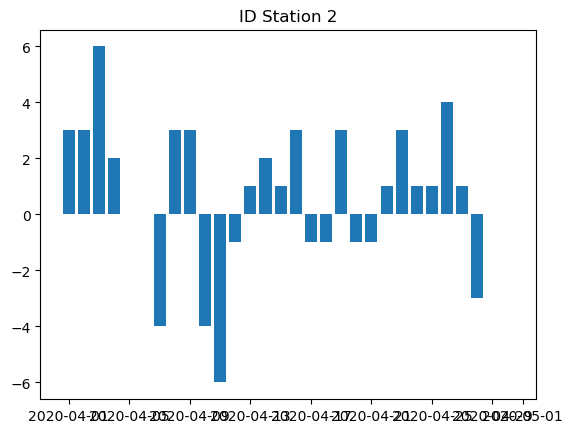

0.6333333333333333


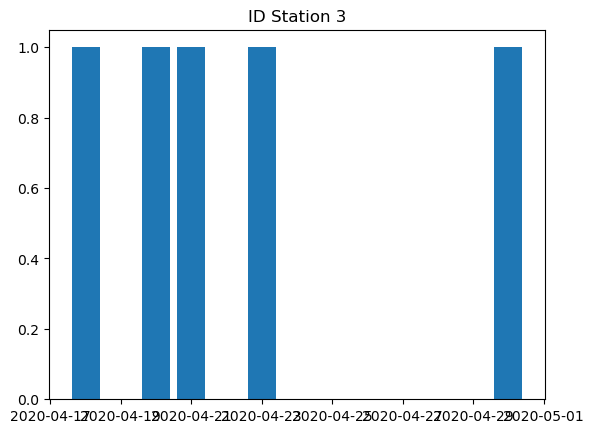

0.8333333333333334


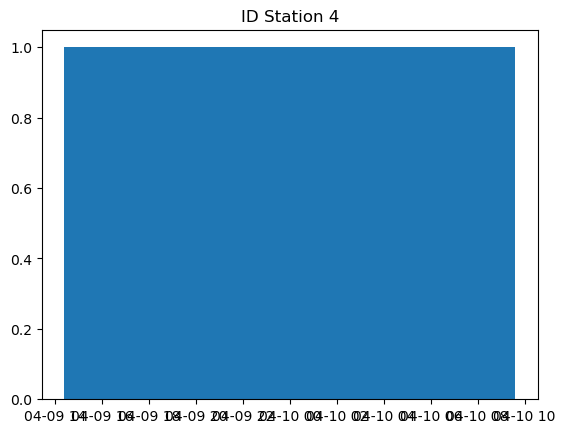

1.0


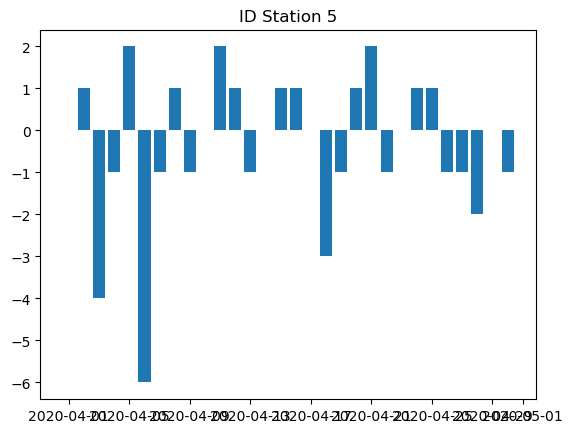

-0.3448275862068966


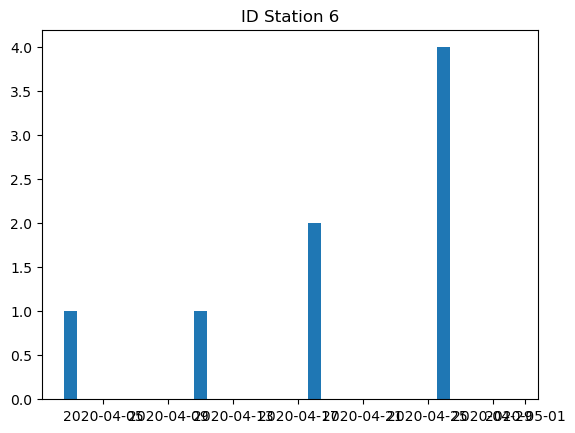

0.8888888888888888


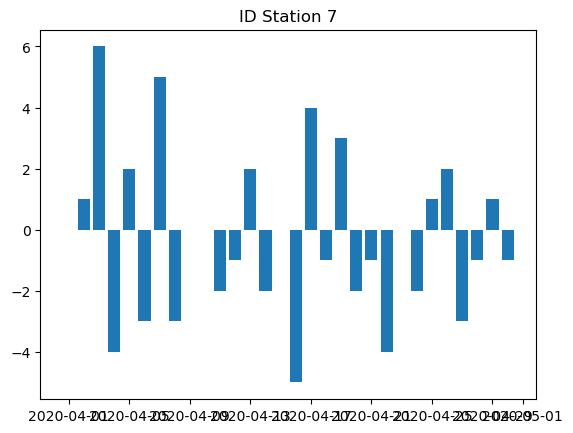

-0.26666666666666666


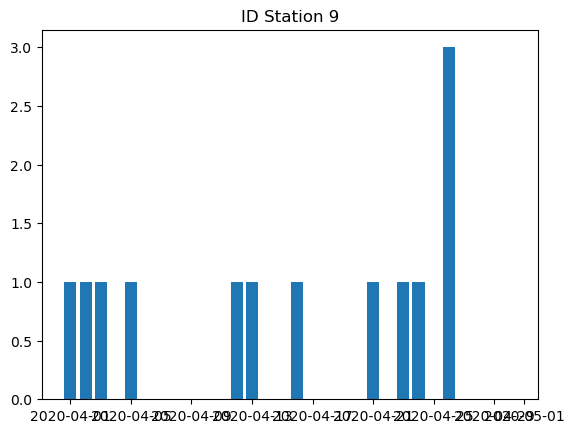

0.65


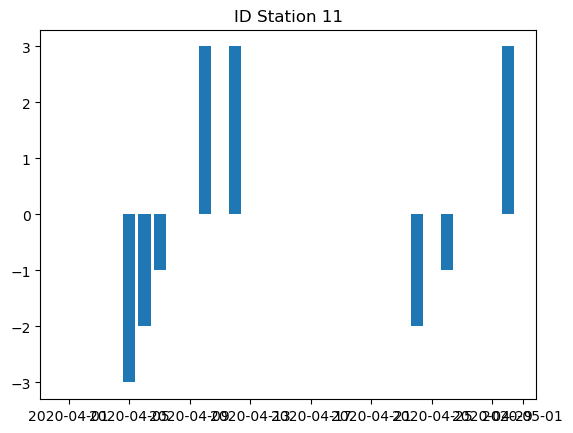

0.0


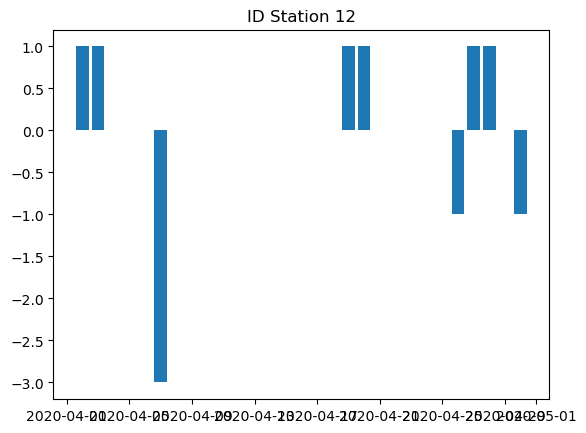

0.045454545454545456


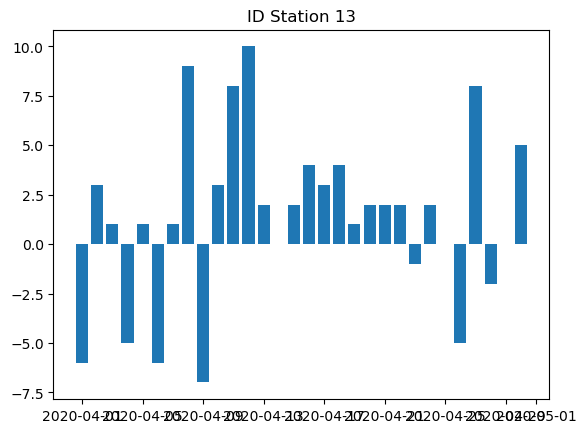

1.4642857142857142


In [37]:
#for each date plot the histogram of the number of bikes at each station
import matplotlib.pyplot as plt


counter = 0
for station in diff_dic.keys():
    plt.bar(diff_dic[station].keys(), diff_dic[station].values())
    plt.title('ID Station ' + str(station))
    plt.show()
    mean = 0
    for v in diff_dic[station].values():
        mean += v
    mean = mean/len(diff_dic[station].values())
    print(mean)
    counter += 1
    if(counter ==10):
        break
    

In [23]:
#add a column to the dataframe with the day of the week
df_train['started_at_day_of_week'] = df_train['started_at'].dt.dayofweek
df_train['ended_at_day_of_week'] = df_train['ended_at'].dt.dayofweek

df_train.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_6072\1911751874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['started_at_day_of_week'] = df_train['started_at'].dt.dayofweek
C:\Users\danie\AppData\Local\Temp\ipykernel_6072\1911751874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ended_at_day_of_week'] = df_train['ended_at'].dt.dayofweek


,started_at,ended_at,start_station_id,end_station_id,member_casual,started_at_day,ended_at_day,started_at_day_of_week,ended_at_day_of_week
0,2020-04-26 17:45:14,2020-04-26 18:12:03,86,152.0,member,2020-04-26,2020-04-26,6,6
1,2020-04-17 17:08:54,2020-04-17 17:17:03,503,499.0,member,2020-04-17,2020-04-17,4,4
2,2020-04-01 17:54:13,2020-04-01 18:08:36,142,255.0,member,2020-04-01,2020-04-01,2,2
3,2020-04-07 12:50:19,2020-04-07 13:02:31,216,657.0,member,2020-04-07,2020-04-07,1,1
4,2020-04-18 10:22:59,2020-04-18 11:15:54,125,323.0,casual,2020-04-18,2020-04-18,5,5


In [ ]:
#plot the difference of bikes for each day of the week
start_dic_week = {}
for index, row in df_train.iterrows():
    if row['start_station_id'] in start_dic_week:
        if row['started_at_day_of_week'] in start_dic_week[row['start_station_id']]:
            start_dic_week[row['start_station_id']][row['started_at_day_of_week']] += 1
        else:
            start_dic_week[row['start_station_id']][row['started_at_day_of_week']] = 1
    else:
        start_dic_week[row['start_station_id']] = {}
        start_dic_week[row['start_station_id']][row['started_at_day_of_week']] = 1

print(start_dic_week)

end_dic_week = {}
for index, row in df_train.iterrows():
    if row['end_station_id'] in end_dic_week:
        if row['ended_at_day_of_week'] in end_dic_week[row['end_station_id']]:
            end_dic_week[row['end_station_id']][row['ended_at_day_of_week']] += 1
        else:
            end_dic_week[row['end_station_id']][row['ended_at_day_of_week']] = 1
    else:
        end_dic_week[row['end_station_id']] = {}
        end_dic_week[row['end_station_id']][row['ended_at_day_of_week']] = 1

print(end_dic_week)

diff_dic_week = {}
for key in start_dic_week:
    diff_dic_week[key] = {}
    for date in start_dic_week[key]:
        if key in end_dic_week and date in end_dic_week[key]:
            diff_dic_week[key][date] = start_dic_week[key][date] - end_dic_week[key][date]
        else:
            diff_dic_week[key][date] = start_dic_week[key][date]

print(end_dic_week)

#sort the dictionary by key
diff_dic_week = dict(sorted(diff_dic_week.items()))
#sort the dictionary by day of the week
for key in diff_dic_week:
    diff_dic_week[key] = dict(sorted(diff_dic_week[key].items()))


{86: {6: 45, 5: 42, 0: 30, 3: 27, 4: 28, 1: 26, 2: 24}, 503: {4: 11, 6: 26, 3: 12, 1: 8, 2: 12, 0: 6, 5: 7}, 142: {2: 55, 6: 69, 3: 65, 5: 45, 0: 69, 4: 46, 1: 58}, 216: {1: 25, 6: 46, 5: 15, 0: 24, 3: 25, 4: 20, 2: 23}, 125: {5: 17, 1: 19, 4: 25, 6: 23, 2: 25, 0: 21, 3: 30}, 173: {3: 76, 1: 73, 2: 51, 0: 67, 6: 47, 4: 51, 5: 31}, 35: {3: 25, 5: 34, 2: 18, 0: 33, 6: 43, 1: 33, 4: 16}, 434: {1: 15, 5: 13, 0: 16, 2: 8, 4: 11, 3: 20, 6: 11}, 627: {2: 45, 6: 48, 4: 41, 3: 41, 0: 34, 5: 48, 1: 38}, 377: {5: 4, 6: 11, 2: 12, 3: 6, 0: 7, 1: 7, 4: 8}, 508: {5: 4, 4: 8, 1: 2, 0: 6, 6: 11, 3: 4, 2: 2}, 374: {5: 35, 4: 29, 3: 20, 6: 49, 0: 27, 1: 35, 2: 18}, 321: {0: 49, 5: 37, 6: 67, 3: 46, 4: 33, 1: 63, 2: 41}, 9: {5: 3, 0: 3, 3: 5, 6: 6, 1: 3, 4: 3, 2: 4}, 141: {5: 81, 6: 138, 1: 76, 0: 60, 3: 81, 4: 56, 2: 50}, 109: {5: 22, 4: 23, 1: 15, 2: 16, 3: 15, 6: 22, 0: 16}, 424: {6: 19, 2: 14, 0: 9, 1: 6, 3: 7, 4: 7, 5: 10}, 347: {4: 15, 2: 15, 1: 27, 5: 15, 6: 34, 3: 17, 0: 16}, 198: {5: 71, 2: 38, 

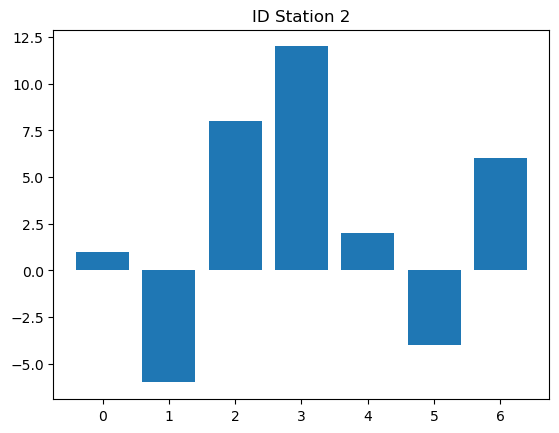

2.7142857142857144


In [ ]:

counter = 0
for station in diff_dic_week.keys():
    plt.bar(diff_dic_week[station].keys(), diff_dic_week[station].values())
    plt.title('ID Station ' + str(station))
    plt.show()
    mean = 0
    for v in diff_dic_week[station].values():
        mean += v
    mean = mean/len(diff_dic_week[station].values())
    print(mean)
    counter += 1
    if(counter ==1):
        break

In [ ]:
# demand : Very High, High, Medium, Low, Very Low
# Very High : v > 3
# High : 1 < v < 3
# Medium : -1 < v < 1
# Low : -3 < v < -1
# Very Low : v < -3

In [42]:
print(diff_dic)

{2: {datetime.date(2020, 4, 1): 3, datetime.date(2020, 4, 2): 3, datetime.date(2020, 4, 3): 6, datetime.date(2020, 4, 4): 2, datetime.date(2020, 4, 5): 0, datetime.date(2020, 4, 6): 0, datetime.date(2020, 4, 7): -4, datetime.date(2020, 4, 8): 3, datetime.date(2020, 4, 9): 3, datetime.date(2020, 4, 10): -4, datetime.date(2020, 4, 11): -6, datetime.date(2020, 4, 12): -1, datetime.date(2020, 4, 13): 1, datetime.date(2020, 4, 14): 2, datetime.date(2020, 4, 15): 1, datetime.date(2020, 4, 16): 3, datetime.date(2020, 4, 17): -1, datetime.date(2020, 4, 18): -1, datetime.date(2020, 4, 19): 3, datetime.date(2020, 4, 20): -1, datetime.date(2020, 4, 21): -1, datetime.date(2020, 4, 22): 1, datetime.date(2020, 4, 23): 3, datetime.date(2020, 4, 24): 1, datetime.date(2020, 4, 25): 1, datetime.date(2020, 4, 26): 4, datetime.date(2020, 4, 27): 1, datetime.date(2020, 4, 28): -3, datetime.date(2020, 4, 29): 0, datetime.date(2020, 4, 30): 0}, 3: {datetime.date(2020, 4, 18): 1, datetime.date(2020, 4, 20): 1

In [132]:
#create a new df from the dictionary diff_dic

df_diff = pd.DataFrame.from_dict(diff_dic)
df_diff = df_diff.reset_index()
df_diff = df_diff.rename(columns={'index':'date'})
df_diff = df_diff.fillna(0)
df_diff.head()

,date,2,3,4,5,6,7,9,11,12,...,659,660,661,662,663,664,666,671,672,673
0,2020-04-01,3,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0
1,2020-04-02,3,0.0,0.0,1.0,0.0,1,1.0,0.0,1.0,...,1.0,-1.0,0.0,0.0,0.0,2.0,1.0,0.0,-2.0,9
2,2020-04-03,6,0.0,0.0,-4.0,1.0,6,1.0,0.0,1.0,...,-1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,-3
3,2020-04-04,2,0.0,0.0,-1.0,0.0,-4,0.0,0.0,0.0,...,-3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-3
4,2020-04-05,0,0.0,0.0,2.0,0.0,2,1.0,-3.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-2


In [165]:
df_diff.head()



df_diff_propre = df_diff.drop(columns=['date'])
df_diff_propre.head()
df_diff_propre = df_diff_propre.T
#add column date at the beginning
df_diff_propre = df_diff_propre.reset_index()

df_diff_propre = df_diff_propre.rename(columns={'index':'date'})


df_diff_propre.columns = ['station_id'] + [str(date) for date in df_diff['date']]


df_diff_propre.head()

,station_id,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
0,2,3.0,3.0,6.0,2.0,0.0,0.0,-4.0,3.0,3.0,...,-1.0,1.0,3.0,1.0,1.0,4.0,1.0,-3.0,0.0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,1.0,-4.0,-1.0,2.0,-6.0,-1.0,1.0,-1.0,...,2.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,0.0,-1.0
4,6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [167]:
df_diff_propre.to_csv('diff_dic.csv', index=False)

In [252]:
#transform each value in high, medium, low, very low, very high
def transform_value(value):
    if value > 3:
        return 'Very High'
    elif value > 1:
        return 'High'
    elif value > -1:
        return 'Medium'
    elif value > -3:
        return 'Low'
    else:
        return 'Very Low'

#remove dete column
df_diff_val = df_diff.drop(columns=['date'])
df_diff_val = df_diff_val.applymap(transform_value)
df_diff_val.head()
df_diff_val = df_diff_val.T
#add column date at the beginning
df_diff_val = df_diff_val.reset_index()

df_diff_val = df_diff_val.rename(columns={'index':'date'})


df_diff_val.columns = ['station_id'] + [str(date) for date in df_diff['date']]


df_diff_val.head()




C:\Users\danie\AppData\Local\Temp\ipykernel_6072\463588139.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_diff_val = df_diff_val.applymap(transform_value)


,station_id,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
0,2,High,High,Very High,High,Medium,Medium,Very Low,High,High,...,Low,Medium,High,Medium,Medium,Very High,Medium,Very Low,Medium,Medium
1,3,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,...,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
2,4,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,...,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
3,5,Medium,Medium,Very Low,Low,High,Very Low,Low,Medium,Low,...,High,Low,Medium,Medium,Medium,Low,Low,Low,Medium,Low
4,6,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,...,Medium,Medium,Medium,Medium,Medium,Very High,Medium,Medium,Medium,Medium


In [253]:
df_diff_val.to_csv('diff_dic_val.csv', index=False)

Le problème est devenu une tache de classification en 5 catégories différentes.

-> RadomForestClassifier  
-> XgBoostClassifier  
-> GradientBoostClassifier  


In [261]:
#import random forect classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split the data in train and test

#print colum with name : 2020-04-30


#df = pd.read_csv("diff_dic.csv")
df = pd.read_csv("diff_dic_val.csv")


#label encode the data except the first column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if column != 'station_id':
        df[column] = le.fit_transform(df[column])



X = df.drop(columns=["2020-04-30"])
y = df["2020-04-30"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [262]:
#train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#predict the test set
y_pred = clf.predict(X_test)

#compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.5206611570247934


In [263]:
print(y_pred)
print(y_test.to_list())

[2 0 2 1 2 2 0 2 2 2 2 2 4 2 4 2 1 2 2 2 1 2 0 2 2 2 1 1 4 0 2 2 1 2 1 2 2
 1 1 2 1 0 1 2 2 2 1 1 1 2 1 1 2 1 2 2 1 2 2 1 2 2 1 2 0 1 0 2 2 2 2 2 2 2
 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 0 4 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1
 2 1 3 2 2 2 2 1 2 2]
[2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 0, 1, 2, 0, 2, 3, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 4, 4, 4, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 0, 4, 2, 1, 0, 2, 1, 2, 2, 4, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 3, 2, 2, 2, 4, 1, 3, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 4, 0, 3, 2, 4, 2, 2, 2, 2, 1, 2, 2]


In [264]:
#try gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

#predict the test set
y_pred = clf.predict(X_test)

#compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.49586776859504134


In [265]:
print(y_pred)
print(y_test.to_list())

[2 1 2 2 2 2 3 2 2 2 2 2 2 2 1 2 0 2 1 2 1 2 2 2 2 2 2 1 2 0 2 2 4 2 1 0 2
 1 2 3 3 4 1 2 2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 2 2 4 2 1 0 0 2 2 2 2 2 2 2
 1 2 1 2 1 2 2 2 2 1 2 2 2 2 2 0 1 0 1 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 1 2 4 2 2 2 2 1 2 2]
[2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 0, 1, 2, 0, 2, 3, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 4, 4, 4, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 0, 4, 2, 1, 0, 2, 1, 2, 2, 4, 3, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 3, 2, 2, 2, 4, 1, 3, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 4, 0, 3, 2, 4, 2, 2, 2, 2, 1, 2, 2]


In [266]:
#try Xgboost classifier
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)

#predict the test set
y_pred = clf.predict(X_test)

#compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.49586776859504134


In [ ]:
#Hyperparameter tuning on xgboost
from sklearn.model_selection import GridSearchCV

#entraine une matrice de model de avec ces parametres afin de trouver celui avec la meilleure accuracy
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [50, 100, 200]
}

clf = XGBClassifier()
grid_clf = GridSearchCV(clf, param_grid, cv=5)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)
print(grid_clf.best_score_)

#predict the test set
y_pred = grid_clf.predict(X_test)

#compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.5531786941580756
0.5454545454545454
